In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
# Load dataset (2020–2025 one)
df = pd.read_csv("../data/raw/delhi_ncr_aqi.csv")

# Keep only complete years
df = df[df["year"] <= 2023]

# Convert to daily AQI
daily_aqi = (
    df.groupby("date")["aqi"]
    .mean()
    .reset_index()
)

daily_aqi["date"] = pd.to_datetime(daily_aqi["date"])
daily_aqi["year"] = daily_aqi["date"].dt.year

# Yearly average AQI
yearly_aqi = (
    daily_aqi.groupby("year")["aqi"]
    .mean()
    .reset_index()
)

yearly_aqi


,year,aqi
0,2020,271.479894
1,2021,268.961078
2,2022,267.745414
3,2023,263.828529


In [3]:
# Monthly AQI
df["month"] = pd.to_datetime(df["date"]).dt.month
df["year"] = pd.to_datetime(df["date"]).dt.year

monthly_aqi = (
    df.groupby(["year", "month"])["aqi"]
    .mean()
    .reset_index()
)

monthly_aqi.head()


,year,month,aqi
0,2020,1,468.611851
1,2020,2,396.766867
2,2020,3,265.815919
3,2020,4,170.851812
4,2020,5,204.771388


In [4]:
monthly_2020 = monthly_aqi[monthly_aqi["year"] == 2020]


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,5))

plt.plot(
    monthly_2020["month"],
    monthly_2020["aqi"],
    marker="o",
    linewidth=3
)

# Highlight lockdown period (Mar–May)
plt.axvspan(3, 5, color="gray", alpha=0.25, label="COVID Lockdown")

plt.title(
    "Delhi Monthly AQI During COVID Lockdown (2020)",
    fontsize=14,
    weight="bold"
)
plt.xlabel("Month")
plt.ylabel("Average AQI")

# Annotate values
for x, y in zip(monthly_2020["month"], monthly_2020["aqi"]):
    plt.text(x, y + 8, f"{int(y)}", ha="center", fontsize=10)

plt.xticks(range(1,13))
plt.legend()
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'seaborn'

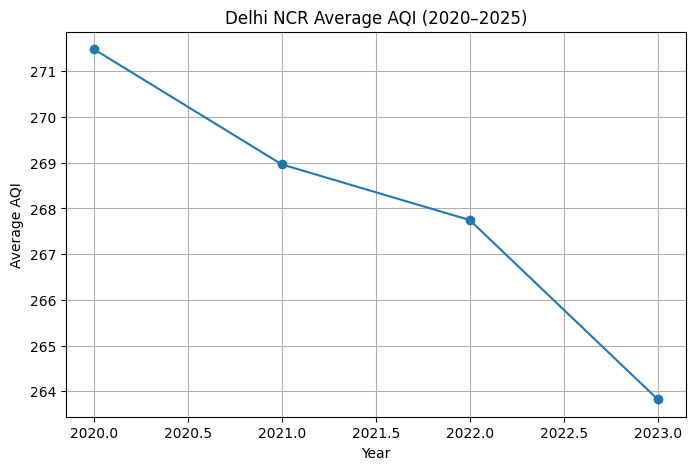

<Figure size 640x480 with 0 Axes>

In [ ]:
yearly_aqi = (
    daily_aqi
    .groupby("year")["aqi"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
plt.plot(yearly_aqi["year"], yearly_aqi["aqi"], marker="o")
plt.title("Delhi NCR Average AQI (2020–2025)")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.grid(True)
plt.show()
# plt.savefig("../visuals/plot.png")


DIWALI

In [ ]:
diwali_start = "2020-11-10"
diwali_end = "2020-11-20"

daily_aqi["is_diwali_period"] = daily_aqi["date"].between(diwali_start, diwali_end)


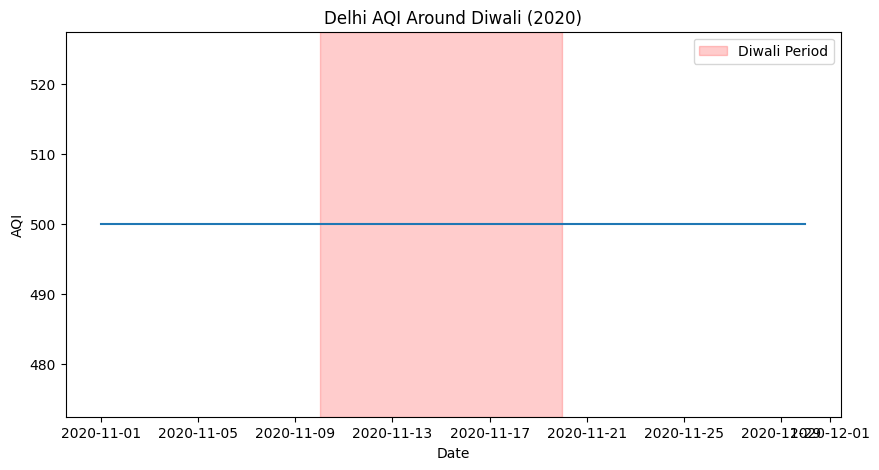

In [ ]:
diwali_data = daily_aqi[
    (daily_aqi["date"] >= "2020-11-01") &
    (daily_aqi["date"] <= "2020-11-30")
]

plt.figure(figsize=(10,5))
plt.plot(diwali_data["date"], diwali_data["aqi"])
plt.axvspan(pd.to_datetime(diwali_start), pd.to_datetime(diwali_end),
            color="red", alpha=0.2, label="Diwali Period")
plt.title("Delhi AQI Around Diwali (2020)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()


In [ ]:
import pandas as pd

df_new = pd.read_csv("../data/raw/delhi_ncr_aqi_dataset.csv")
df_new.head()


,datetime,date,year,month,day,hour,day_of_week,is_weekend,season,city,...,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi,aqi_category
0,2020-01-01 06:00:00,2020-01-01,2020,1,1,6,Wednesday,0,winter,Delhi,...,119.6,47.7,5.19,12.3,9.4,100,3.6,1.2,500,Severe
1,2020-01-01 12:00:00,2020-01-01,2020,1,1,12,Wednesday,0,winter,Delhi,...,117.9,39.3,4.32,15.8,20.6,50,5.9,1.4,500,Severe
2,2020-01-01 18:00:00,2020-01-01,2020,1,1,18,Wednesday,0,winter,Delhi,...,150.1,36.3,7.13,14.3,12.4,56,4.5,1.1,500,Severe
3,2020-01-01 23:00:00,2020-01-01,2020,1,1,23,Wednesday,0,winter,Delhi,...,142.0,30.3,4.90,13.2,14.4,48,5.8,1.4,500,Severe
4,2020-01-01 06:00:00,2020-01-01,2020,1,1,6,Wednesday,0,winter,Delhi,...,138.4,41.5,7.56,15.4,6.8,100,2.8,0.4,500,Severe


In [ ]:
df_new.shape


(201664, 25)

In [ ]:
df_new.columns


Index(['datetime', 'date', 'year', 'month', 'day', 'hour', 'day_of_week',
       'is_weekend', 'season', 'city', 'station', 'latitude', 'longitude',
       'pm25', 'pm10', 'no2', 'so2', 'co', 'o3', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'aqi', 'aqi_category'],
      dtype='str')

In [ ]:
df_new.dtypes


datetime            str
date                str
year              int64
month             int64
day               int64
hour              int64
day_of_week         str
is_weekend        int64
season              str
city                str
station             str
latitude        float64
longitude       float64
pm25            float64
pm10            float64
no2             float64
so2             float64
co              float64
o3              float64
temperature     float64
humidity          int64
wind_speed      float64
visibility      float64
aqi               int64
aqi_category        str
dtype: object

In [ ]:
# Ensure datetime
if "datetime" in df_new.columns:
    df_new["date"] = pd.to_datetime(df_new["datetime"])
elif "date" in df_new.columns:
    df_new["date"] = pd.to_datetime(df_new["date"])
else:
    raise ValueError("No date/datetime column found")

# Extract year
df_new["year"] = df_new["date"].dt.year
df_new["month"] = df_new["date"].dt.month

df_new[["date", "year", "month"]].head()


,date,year,month
0,2020-01-01 06:00:00,2020,1
1,2020-01-01 12:00:00,2020,1
2,2020-01-01 18:00:00,2020,1
3,2020-01-01 23:00:00,2020,1
4,2020-01-01 06:00:00,2020,1


In [ ]:
df_new["year"].value_counts().sort_index()


year
2020    33672
2021    33580
2022    33580
2023    33580
2024    33672
2025    33580
Name: count, dtype: int64

In [ ]:
df_new["aqi"].describe()


count    201664.000000
mean        265.830148
std         171.508950
min          25.000000
25%         103.000000
50%         232.000000
75%         464.000000
max         500.000000
Name: aqi, dtype: float64

In [ ]:
df_new = df_new[(df_new["aqi"] >= 0) & (df_new["aqi"] <= 500)]


In [ ]:
df_new.to_csv("../data/processed/delhi_ncr_aqi_2020_2024_clean.csv", index=False)


In [ ]:
diwali_dates = {
    2020: "2020-11-14",
    2021: "2021-11-04",
    2022: "2022-10-24",
    2023: "2023-11-12",
    2024: "2024-11-01"
}


In [ ]:
import pandas as pd

df_new["date"] = pd.to_datetime(df_new["date"])

diwali_rows = []

for year, d_date in diwali_dates.items():
    d_date = pd.to_datetime(d_date)
    
    temp = df_new[
        (df_new["date"] >= d_date - pd.Timedelta(days=7)) &
        (df_new["date"] <= d_date + pd.Timedelta(days=7)) &
        (df_new["year"] == year)
    ].copy()
    
    temp["day_from_diwali"] = (temp["date"] - d_date).dt.days
    temp["diwali_year"] = year
    
    diwali_rows.append(temp)

diwali_df = pd.concat(diwali_rows)


In [ ]:
diwali_daily = (
    diwali_df
    .groupby(["diwali_year", "day_from_diwali"])["aqi"]
    .mean()
    .reset_index()
)

diwali_daily.head()


,diwali_year,day_from_diwali,aqi
0,2020,-7,500.0
1,2020,-6,500.0
2,2020,-5,500.0
3,2020,-4,500.0
4,2020,-3,500.0


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    diwali_daily,
    x="day_from_diwali",
    y="diwali_year",
    z="aqi",
    color="aqi",
    color_continuous_scale="Inferno",
    labels={
        "day_from_diwali": "Days from Diwali",
        "diwali_year": "Year",
        "aqi": "Average AQI"
    },
    title="Delhi AQI Spike Around Diwali (2020–2024)"
)

fig.update_traces(marker=dict(size=6))
fig.update_layout(
    height=650,
    scene=dict(
        xaxis=dict(title="Days from Diwali (−7 to +7)"),
        yaxis=dict(title="Year"),
        zaxis=dict(title="AQI")
    )
)

fig.show()


In [ ]:
import plotly.express as px

fig = px.density_heatmap(
    diwali_daily,
    x="day_from_diwali",
    y="diwali_year",
    z="aqi",
    color_continuous_scale="Inferno",
    labels={
        "day_from_diwali": "Days from Diwali",
        "diwali_year": "Year",
        "aqi": "Average AQI"
    },
    title="Delhi AQI Around Diwali (Heatmap View)"
)

fig.update_layout(
    height=450,
    xaxis=dict(tickmode="linear"),
    yaxis=dict(type="category")
)

fig.show()


In [ ]:
fig = px.line(
    diwali_daily,
    x="day_from_diwali",
    y="aqi",
    facet_row="diwali_year",
    markers=True,
    labels={
        "day_from_diwali": "Days from Diwali",
        "aqi": "Average AQI"
    },
    title="Delhi AQI Around Diwali by Year"
)

fig.update_layout(
    height=900,
    showlegend=False
)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()


In [ ]:
monthly_aqi = (
    df_new
    .groupby(["year", "month"])["aqi"]
    .mean()
    .reset_index()
)

monthly_aqi.head()


NameError: name 'df_new' is not defined

In [ ]:
month_map = {
    1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",
    7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"
}
monthly_aqi["month_name"] = monthly_aqi["month"].map(month_map)


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(
    monthly_aqi,
    x="month",
    y="aqi",
    color="year",
    labels={
        "month": "",
        "aqi": "Average AQI",
        "year": "Year"
    },
    title="Delhi’s Seasonal Air Pollution Wave (2020–2024)",
    color_discrete_sequence=px.colors.sequential.Greys
)

# Main wave styling
fig.update_traces(
    line=dict(
        width=2.5,
        shape="spline"
    ),
    opacity=0.45
)

# Subtle glow effect (duplicate traces behind)
for trace in fig.data:
    fig.add_trace(
        go.Scatter(
            x=trace.x,
            y=trace.y,
            mode="lines",
            line=dict(
                width=6,
                shape="spline",
                color="rgba(0,0,0,0.06)"
            ),
            hoverinfo="skip",
            showlegend=False
        )
    )

# Editorial layout polish
fig.update_layout(
    height=540,
    hovermode="x unified",
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(
        family="Georgia",
        size=14,
        color="black"
    ),
    title=dict(
        x=0.02,
        y=0.96
    ),
    xaxis=dict(
        tickmode="array",
        tickvals=list(range(1, 13)),
        ticktext=list(month_map.values()),
        showgrid=False
    ),
    yaxis=dict(
        title="Average AQI",
        showgrid=True,
        gridcolor="rgba(0,0,0,0.08)",
        zeroline=False
    ),
    legend=dict(
        orientation="h",
        y=-0.2,
        x=0.5,
        xanchor="center",
        title_text=""
    ),
    margin=dict(l=70, r=40, t=80, b=80)
)

# Winter emphasis band (very subtle)
fig.add_vrect(
    x0=10.5, x1=2.5,
    fillcolor="black",
    opacity=0.05,
    layer="below",
    line_width=0
)

fig.show()


NameError: name 'month_map' is not defined

In [ ]:
monthly_aqi = (
    df_new
    .groupby(["year", "month"])["aqi"]
    .mean()
    .reset_index()
)


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(
    monthly_aqi,
    x="month",
    y="aqi",
    color="year",
    labels={
        "month": "",
        "aqi": "Average AQI",
        "year": "Year"
    },
    title="Delhi’s Seasonal Air Pollution Wave (2021–2024)",
    color_discrete_sequence=px.colors.sequential.Greys
)

# Main wave styling
fig.update_traces(
    line=dict(
        width=2.5,
        shape="spline"
    ),
    opacity=0.45
)

# Subtle glow effect (duplicate traces behind)
for trace in fig.data:
    fig.add_trace(
        go.Scatter(
            x=trace.x,
            y=trace.y,
            mode="lines",
            line=dict(
                width=6,
                shape="spline",
                color="rgba(0,0,0,0.06)"
            ),
            hoverinfo="skip",
            showlegend=False
        )
    )

# Editorial layout polish
fig.update_layout(
    height=540,
    hovermode="x unified",
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(
        family="Georgia",
        size=14,
        color="black"
    ),
    title=dict(
        x=0.02,
        y=0.96
    ),
    xaxis=dict(
        tickmode="array",
        tickvals=list(range(1, 13)),
        ticktext=list(month_map.values()),
        showgrid=False
    ),
    yaxis=dict(
        title="Average AQI",
        showgrid=True,
        gridcolor="rgba(0,0,0,0.08)",
        zeroline=False
    ),
    legend=dict(
        orientation="h",
        y=-0.2,
        x=0.5,
        xanchor="center",
        title_text=""
    ),
    margin=dict(l=70, r=40, t=80, b=80)
)

# Winter emphasis band (very subtle)
fig.add_vrect(
    x0=10.5, x1=2.5,
    fillcolor="black",
    opacity=0.05,
    layer="below",
    line_width=0
)

fig.show()


NameError: name 'month_map' is not defined

In [ ]:
fig.update_layout(hovermode="x unified")


In [ ]:
fig.add_vrect(
    x0=9.5, x1=11.5,
    fillcolor="gray",
    opacity=0.12,
    layer="below",
    line_width=0,
    annotation_text="Diwali & early winter",
    annotation_position="top left"
)
fig.write_html(
    "../plots/winter_delhi.html",
    include_plotlyjs="cdn",
    full_html=False
)


In [ ]:
fig.update_traces(
    hovertemplate=
    "<b>Year:</b> %{customdata[0]}<br>" +
    "<b>Month:</b> %{x}<br>" +
    "<b>AQI:</b> %{y:.1f}<extra></extra>",
    customdata=monthly_aqi[["year"]]
)


In [ ]:
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label="All Years",
                    method="update",
                    args=[{"visible": [True]*len(fig.data)}]
                ),
                dict(
                    label="Only 2020",
                    method="update",
                    args=[{"visible": [trace.name=="2020" for trace in fig.data]}]
                )
            ],
            direction="down",
            showactive=True,
            x=1.15,
            y=0.9
        )
    ]
)


In [ ]:
import plotly.express as px

fig = px.line(
    yearly_aqi,
    x="year",
    y="aqi",
    markers=True,
    title="Delhi Yearly Average AQI (2020–2024)",
    labels={
        "year": "Year",
        "aqi": "Average AQI"
    }
)

fig.update_traces(
    line=dict(width=4),
    marker=dict(size=9),
    hovertemplate=
        "<b>Year:</b> %{x}<br>" +
        "<b>Avg AQI:</b> %{y:.1f}" +
        "<extra></extra>"
)

fig.update_layout(
    hovermode="x",
    height=450,
    xaxis=dict(tickmode="linear"),
    yaxis=dict(range=[0, 500])
)

fig.show()


In [ ]:
# Imports
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path

# ---------- CONFIG ----------
DATA_PATH = "../data/raw/delhi_ncr_dataset.csv"   # <- change path if different
OUT_DIR = Path("plots")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# Define winter months for analysis (Nov-Feb)
WINTER_MONTHS = [11, 12, 1, 2]

# ---------- 1. Load dataset (robust) ----------
df = pd.read_csv(DATA_PATH, low_memory=False)

# Try to find a datetime column: common names
dt_candidates = [c for c in df.columns if c.lower() in ("datetime","date","last_update","sampling_date")]
if not dt_candidates:
    raise ValueError("No date/datetime column found. Columns: " + ", ".join(df.columns))
dt_col = dt_candidates[0]

# Parse datetime safely
df[dt_col] = pd.to_datetime(df[dt_col], errors="coerce")
df = df.dropna(subset=[dt_col])  # remove rows with bad dates
df["year"] = df[dt_col].dt.year
df["month"] = df[dt_col].dt.month
df["month_name"] = df[dt_col].dt.strftime("%b")

# ---------- 2. Locate AQI column (robust) ----------
# common names: 'AQI','aqi'
aqi_candidates = [c for c in df.columns if c.lower() == "aqi" or "aqi" in c.lower()]
if not aqi_candidates:
    # maybe you have PM2.5 only; try to use 'PM2.5' -> convert to an approximate AQI? (skip now)
    raise ValueError("No AQI column found. Columns: " + ", ".join(df.columns))
aqi_col = aqi_candidates[0]
df[aqi_col] = pd.to_numeric(df[aqi_col], errors="coerce")
df = df.dropna(subset=[aqi_col])

# ---------- 3. Filter years 2020-2025 ----------
df = df[(df["year"] >= 2020) & (df["year"] <= 2025)].copy()
if df.empty:
    raise ValueError("No rows in years 2020-2025. Check your dataset or date parsing.")

# ---------- 4. Yearly average AQI ----------
yearly = df.groupby("year")[aqi_col].mean().reset_index().rename(columns={aqi_col: "avg_aqi"})
print("Yearly rows:", yearly.shape[0])
print(yearly)

# ---------- 5. Monthly (seasonal) averages across years (for waves) ----------
monthly_year = (
    df.groupby(["year", "month"]) [aqi_col]
    .mean()
    .reset_index()
    .rename(columns={aqi_col: "avg_aqi"})
)

# Ensure months 1..12 present for each year (fill missing with NaN so plotting stays aligned)
all_years = sorted(monthly_year["year"].unique())
all_months = list(range(1,13))
idx = pd.MultiIndex.from_product([all_years, all_months], names=["year","month"])
monthly_year = monthly_year.set_index(["year","month"]).reindex(idx).reset_index()
monthly_year["month_name"] = monthly_year["month"].apply(lambda m: pd.Timestamp(2020, m, 1).strftime("%b"))

# ---------- 6. Winter vs non-winter summary ----------
df["is_winter"] = df["month"].isin(WINTER_MONTHS)
winter_avg = df[df["is_winter"]][aqi_col].mean()
nonwinter_avg = df[~df["is_winter"]][aqi_col].mean()
pct_change = (winter_avg - nonwinter_avg) / nonwinter_avg * 100 if nonwinter_avg else np.nan

summary = {
    "winter_avg": winter_avg,
    "nonwinter_avg": nonwinter_avg,
    "percent_increase_winter_vs_nonwinter": pct_change
}
print("Winter vs Non-winter summary:", summary)

# ---------- 7. Plot: Yearly average AQI (publication style) ----------
fig1 = px.bar(
    yearly,
    x="year",
    y="avg_aqi",
    labels={"avg_aqi":"Average AQI","year":"Year"},
    title="Delhi — Yearly Average AQI (2020–2025)"
)
fig1.update_traces(marker_color="black", opacity=0.9)
fig1.update_layout(
    plot_bgcolor="white",
    height=480,
    xaxis=dict(tickmode="linear"),
    yaxis=dict(gridcolor="rgba(0,0,0,0.06)"),
    font=dict(family="Georgia", size=13)
)
fig1.write_html(OUT_DIR/"delhi_yearly_aqi.html", include_plotlyjs="cdn", full_html=False)

# ---------- 8. Plot: Seasonal wave (layered) with winter band and glow effect ----------
# Use monthly_year prepared above
# We'll style context years faded, highlight the median (or last) year if desired.
focus_year = 2024  # change to any year to emphasize, or None to highlight last year in data
palette = px.colors.sequential.Greys

fig2 = go.Figure()

# Context years (faded lines)
for y in all_years:
    ydf = monthly_year[monthly_year["year"] == y]
    fig2.add_trace(go.Scatter(
        x=ydf["month"],
        y=ydf["avg_aqi"],
        mode="lines",
        line=dict(color="rgba(0,0,0,0.18)", width=1.5, shape="spline"),
        name=str(y),
        showlegend=False,
        hoverinfo="skip"
    ))

# Focus year (thicker and black). If focus not in data, use last year available.
if focus_year not in all_years:
    focus_year = all_years[-1]
ydf = monthly_year[monthly_year["year"] == focus_year]
fig2.add_trace(go.Scatter(
    x=ydf["month"],
    y=ydf["avg_aqi"],
    mode="lines",
    line=dict(color="black", width=3.2, shape="spline"),
    name=f"Focus: {focus_year}",
    hovertemplate="Month %{x}: %{y:.1f} AQI<extra></extra>"
))

# Add subtle glow by duplicating focus line behind with low alpha
fig2.add_trace(go.Scatter(
    x=ydf["month"],
    y=ydf["avg_aqi"],
    mode="lines",
    line=dict(color="rgba(0,0,0,0.07)", width=10, shape="spline"),
    hoverinfo="skip",
    showlegend=False
))

# Winter band (Nov-Feb). We'll draw two rectangles: Nov-Dec and Jan-Feb for x axis numeric months
fig2.add_vrect(x0=10.5, x1=12.5, fillcolor="black", opacity=0.04, layer="below", line_width=0)
fig2.add_vrect(x0=0.5, x1=2.5, fillcolor="black", opacity=0.04, layer="below", line_width=0)

# Layout polish
fig2.update_layout(
    title="Seasonal AQI Wave — Delhi (monthly averages, 2020–2025)",
    xaxis=dict(
        tickmode="array",
        tickvals=list(range(1,13)),
        ticktext=[pd.Timestamp(2020,m,1).strftime("%b") for m in range(1,13)],
        showgrid=False,
        title=""
    ),
    yaxis=dict(title="Average AQI", gridcolor="rgba(0,0,0,0.06)"),
    plot_bgcolor="white",
    paper_bgcolor="white",
    height=540,
    font=dict(family="Georgia", size=13),
    hovermode="x unified",
    margin=dict(l=70, r=40, t=80, b=70),
    showlegend=True
)

# Put legend for focus only
fig2.update_traces(selector=dict(name=f"Focus: {focus_year}"), showlegend=True)

# Save
fig2.write_html(OUT_DIR/"delhi_seasonal_wave.html", include_plotlyjs="cdn", full_html=False)

# ---------- 9. Quick numeric summary per month to show winter peaks (optional) ----------
monthly_mean_allyears = monthly_year.groupby("month")["avg_aqi"].mean().reset_index()
monthly_mean_allyears["month_name"] = monthly_mean_allyears["month"].apply(lambda m: pd.Timestamp(2020,m,1).strftime("%b"))
print(monthly_mean_allyears)

# ---------- 10. Print final notes and where files are saved ----------
print("\nSaved plots:")
print(" -", OUT_DIR/"delhi_yearly_aqi.html")
print(" -", OUT_DIR/"delhi_seasonal_wave.html")
print("\nWinter mean AQI: {:.1f}".format(winter_avg))
print("Non-winter mean AQI: {:.1f}".format(nonwinter_avg))
print("Winter vs Non-winter % increase: {:.1f}%".format(pct_change))


FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/delhi_ncr_dataset.csv'

In [6]:
import pandas as pd

df = pd.read_csv("../data/raw/major_city.csv")

# fix datetime
df["Datetime"] = pd.to_datetime(df["Datetime"], errors="coerce")

# remove broken rows
df = df.dropna(subset=["Datetime", "AQI"])

# keep relevant cities only (optional)
cities = ["Delhi", "Mumbai", "Chennai", "Kolkata", "Bangalore"]
df = df[df["City"].isin(cities)]

df.head()


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,60.9,Satisfactory
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,486.5,Severe
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,174.4,Very Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,489.7,Good


In [7]:
df["Year"] = df["Datetime"].dt.year


In [8]:
import plotly.express as px

fig = px.box(
    df,
    x="City",
    y="AQI",
    color="City",
    points=False,
    title="Distribution of AQI Across Major Indian Cities"
)

fig.update_layout(
    template="plotly_white",
    height=600
)

fig.show()


In [9]:
    # define hazardous AQI threshold
hazardous = df[df["AQI"] >= 300]

city_share = (
    hazardous.groupby("City")
    .size()
    / df.groupby("City").size()
    * 100
).reset_index(name="Hazardous_Day_%")

city_share = city_share.sort_values("Hazardous_Day_%", ascending=False)

import plotly.express as px

fig = px.bar(
    city_share,
    x="City",
    y="Hazardous_Day_%",
    color="City",
    title="Share of Hazardous AQI Days Across Major Cities"
)

fig.update_layout(
    template="plotly_white",
    height=500,
    yaxis_title="Days with AQI ≥ 300 (%)"
)

fig.show()


In [10]:
top_decile = (
    df.groupby("City")["AQI"]
    .quantile(0.9)
    .reset_index(name="90th_percentile_AQI")
    .sort_values("90th_percentile_AQI", ascending=False)
)

fig = px.bar(
    top_decile,
    x="City",
    y="90th_percentile_AQI",
    title="Worst 10% AQI Levels by City"
)

fig.update_layout(
    template="plotly_white",
    height=500,
    yaxis_title="AQI (90th percentile)"
)

fig.show()


In [1]:
import pandas as pd
import numpy as np

# load
df = pd.read_csv("../data/raw/major_city.csv")

# fix datetime
df["Datetime"] = pd.to_datetime(df["Datetime"], errors="coerce")
df = df.dropna(subset=["Datetime"])

# keep needed columns
df = df[["City", "Datetime", "AQI"]]

# define periods
df["period"] = np.where(df["Datetime"] < "2020-03-25", "pre_covid", "post_covid")

# hazardous flag
df["hazard"] = df["AQI"] >= 300


In [2]:
hazard_summary = (
    df.groupby(["City", "period"])["hazard"]
    .mean()
    .reset_index()
)

hazard_summary["hazard_pct"] = hazard_summary["hazard"] * 100
hazard_summary


,City,period,hazard,hazard_pct
0,Bangalore,post_covid,0.393574,39.357430
1,Bangalore,pre_covid,0.399476,39.947644
2,Chennai,post_covid,0.394148,39.414802
3,Chennai,pre_covid,0.404188,40.418848
4,Delhi,post_covid,0.410786,41.078600
5,Delhi,pre_covid,0.395812,39.581152
6,Kolkata,post_covid,0.404475,40.447504
7,Kolkata,pre_covid,0.393194,39.319372
8,Mumbai,post_covid,0.417671,41.767068
9,Mumbai,pre_covid,0.413613,41.361257


In [3]:
import plotly.express as px

fig = px.bar(
    hazard_summary,
    x="City",
    y="hazard_pct",
    color="period",
    barmode="group",
    title="Share of Hazardous AQI Days Before vs After COVID",
    labels={"hazard_pct": "% of Hazardous Days"}
)

# highlight Delhi
for trace in fig.data:
    if "Delhi" in trace.name:
        trace.marker.line.width = 2

fig.update_layout(
    template="plotly_white",
    height=500
)

fig.show()


In [4]:
fig.write_html("../plots/hazard_share.html")


In [5]:
# winter months
winter = df[df["Datetime"].dt.month.isin([11, 12, 1])]

winter_summary = (
    winter.groupby("City")["hazard"]
    .mean()
    .reset_index()
)

winter_summary["winter_hazard_pct"] = winter_summary["hazard"] * 100
winter_summary


,City,hazard,winter_hazard_pct
0,Bangalore,0.388043,38.804348
1,Chennai,0.418478,41.847826
2,Delhi,0.398913,39.891304
3,Kolkata,0.401087,40.108696
4,Mumbai,0.410870,41.086957


In [6]:
import plotly.express as px

fig = px.bar(
    winter_summary,
    x="City",
    y="winter_hazard_pct",
    color="City",
    title="Share of Hazardous Winter Days by City"
)

fig.update_layout(
    template="plotly_white",
    height=500,
    yaxis_title="% Hazardous Winter Days"
)

fig.show()


In [7]:
fig.write_html("../plots/winter_share.html")
